### Using SVM for classification problem using BankNote dataset from UCI 
- Dataset from Machine Learning Repository, University of California, Irvine, School of Information and Computer Sciences, http://archive.ics.uci.edu/ml;
- Dataset informations (from source), https://archive.ics.uci.edu/ml/datasets/banknote+authentication:
     Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

    Attribute Information:

    1. variance of Wavelet Transformed image (continuous)
    2. skewness of Wavelet Transformed image (continuous)
    3. curtosis of Wavelet Transformed image (continuous)
    4. entropy of image (continuous)
    5. class (integer)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import cross_val_score

%matplotlib inline 
#importing dataset from txt
#bankdata = pd.read_csv('D:/Mario/AI/datasets/banknote_authentication.txt')

#showing de shape e seeing some exemples 
#load dataset of iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
bankdata = pd.read_csv(url,names=names)
bankdata.shape

(1372, 5)

NameError: name 'scatter_matrix' is not defined

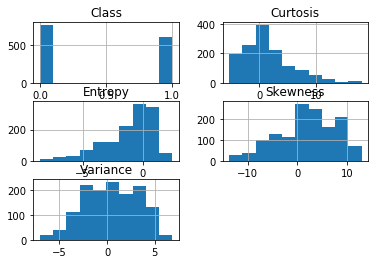

In [4]:
bankdata.head()
bankdata.hist()
scatter_matrix(bankdata)
plt.show()

In [ ]:
# seeing if features are in the same scale
bankdata.describe()

In [ ]:
#getting just the features (our X values)
X = bankdata.drop('Class', axis=1)
#getting the classification output (our y values)
y = bankdata['Class']
#splitting the dataset in test and traning set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=33)

In [ ]:
#fitting the dataset to the classifier
svclassifier = SVC(kernel='linear')#,C=0.1, degree=3, verbose=True)
svclassifier.fit(X_train, y_train)

In [ ]:
#making predictions upon test set to measure the accuracy of the model
y_pred = svclassifier.predict(X_test)
#showing model's metrics (prediction accuracy of the model)
print("# Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

In [ ]:
print("# Classification report")
print(classification_report(y_test,y_pred))

In [ ]:
#calculating the accuracy
print('# Accuracy score on TEST SET', accuracy_score(y_test,y_pred))

In [ ]:
#evaluating the model using Cross Validation
scores = cross_val_score(svclassifier, X, y, cv=5)
print(scores)
print("# Accuracy using K-fold Cross Validation: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))